In [ ]:
Practical 6: SVM regressor on the California Housing Dataset

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test=pd.read_csv("./california_housing_test.csv")
train=pd.read_csv("./california_housing_train.csv")

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,332400
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,252100
2,-118.02,33.90,34,2678,511,1540,497,4.4954,202900
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,116300
4,-120.90,39.93,23,2679,546,1424,529,2.8812,81900


In [5]:
test.tail()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3397,3398,-118.33,34.09,36,654,186,416,138,3.6953
3398,3399,-117.88,34.09,29,3416,790,2223,728,3.5109
3399,3400,-118.32,34.26,32,3690,791,1804,715,4.4875
3400,3401,-118.12,33.80,35,1835,435,774,418,2.7092
3401,3402,-118.19,33.78,42,1021,300,533,187,1.8036


In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13598 entries, 0 to 13597
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13598 non-null  float64
 1   latitude            13598 non-null  float64
 2   housing_median_age  13598 non-null  int64  
 3   total_rooms         13598 non-null  int64  
 4   total_bedrooms      13598 non-null  int64  
 5   population          13598 non-null  int64  
 6   households          13598 non-null  int64  
 7   median_income       13598 non-null  float64
 8   median_house_value  13598 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 956.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3402 non-null   int64  
 1   longitude           3402 non-null   fl

In [7]:
n_train = train.shape[0]
n_test = test.shape[0]
y = train['median_house_value'].values
data = pd.concat((train, test)).reset_index(drop = True)
data.drop(['longitude','latitude'], axis=1, inplace = True)

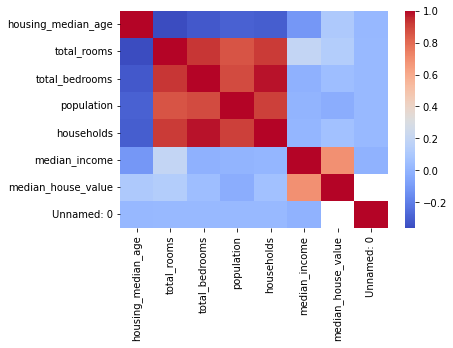

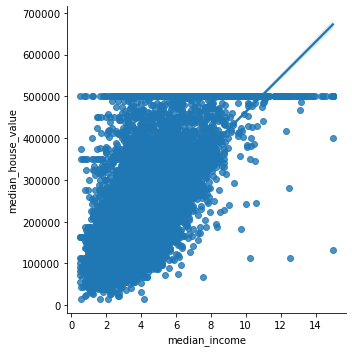

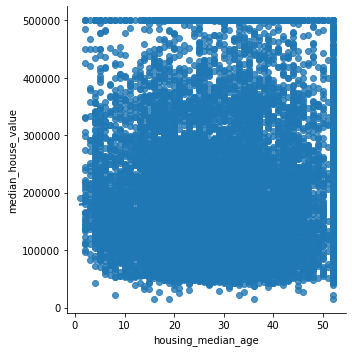

In [8]:
#VISUALISING THE DATA
#Visualise the data
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()
sns.lmplot(x='median_income', y='median_house_value', data=train)
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)


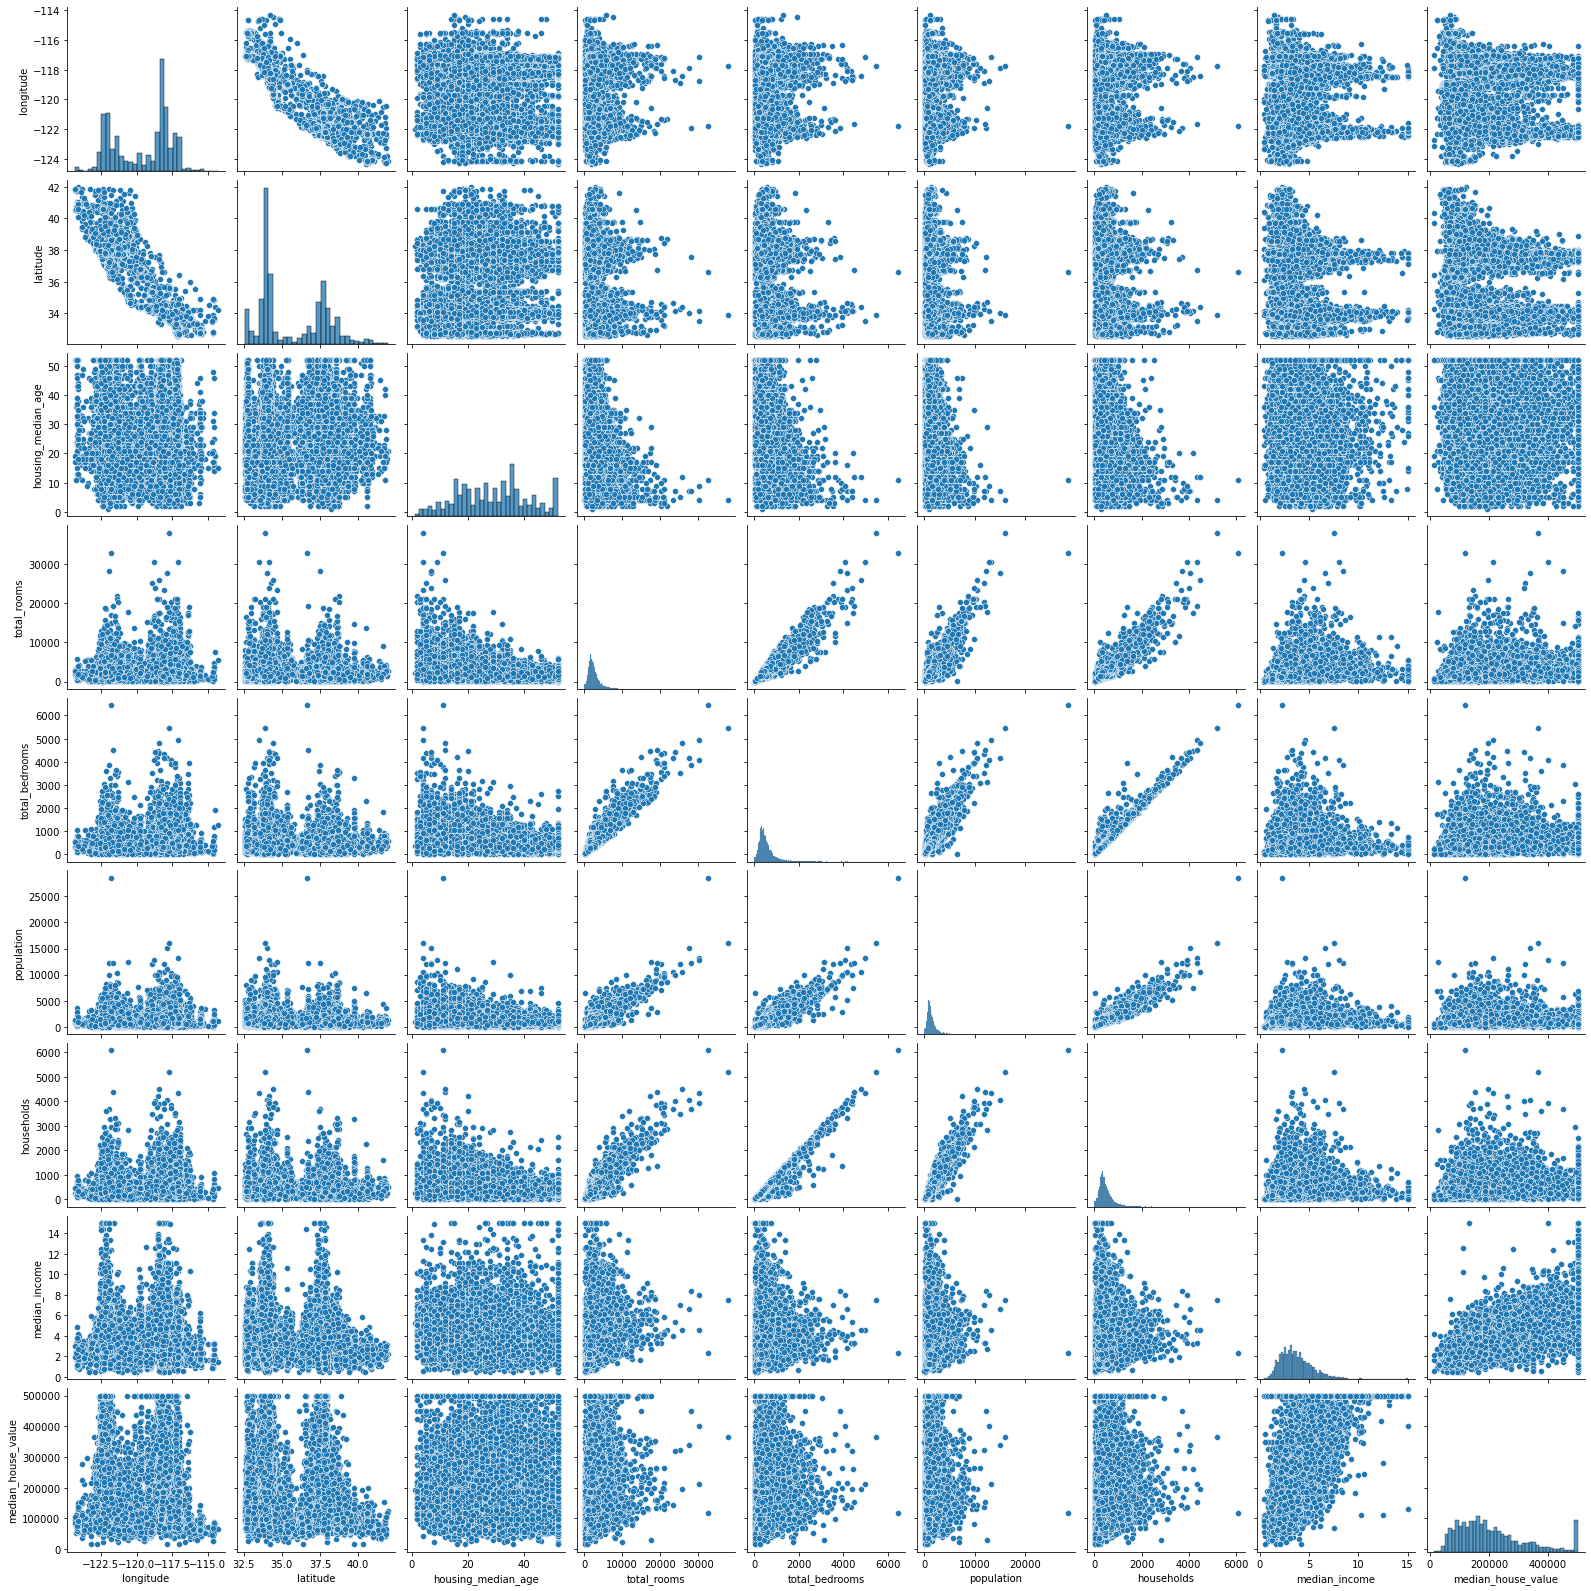

In [9]:
sns.pairplot(train, palette='rainbow')

In [10]:
#FEATURE ENGINEERING
#Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques.
#Select appropriate features
data = data[['total_rooms', 'total_bedrooms', 'housing_median_age','median_income', 'population', 'households']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         17000 non-null  int64  
 1   total_bedrooms      17000 non-null  int64  
 2   housing_median_age  17000 non-null  int64  
 3   median_income       17000 non-null  float64
 4   population          17000 non-null  int64  
 5   households          17000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 797.0 KB


In [16]:
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data['housing_median_age'] = data['housing_median_age'].fillna(data['housing_median_age'].mean())
data['median_income'] = data['median_income'].fillna(data['median_income'].mean())
data['population'] = data['population'].fillna(data['population'].mean())
data['households'] = data['households'].fillna(data['households'].mean())

In [17]:
train = data[:n_train]
test = data[n_train:]

In [18]:
#FITTING THE MODEL
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [25]:
# Fit the model over the training data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#note working
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

In [ ]:
#not working
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)),'Predicted Values':y_pred})
df